In [1]:
import tessbatman as tb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Configure Batman Parameter File
tmin, tmax, tstep = (-30, 30, 0.13889)  # time (x val of batman curves)
wmin, wmax, wnum, wlog = (-3.9, -2.5, 30, True)  # width of batman curves
suffix = "_test"  # suffix to append to all files
# path = "/home/cjtu/projects/tess_batman/code/test/"
path = "/common/contrib/classroom/ast520/tess_batman/data/batman/"

tb.make_batman_config(tmin, tmax, tstep, wmin, wmax, wnum, wlog, suffix, path)

# Test the config
import json
from pprint import pprint
with open(path+"batmanConfig_test.param") as f:
    d=json.load(f)
pprint(d)

Batman config written to /common/contrib/classroom/ast520/tess_batman/data/batman/batmanConfig_test.param
{'curves_fname': '/common/contrib/classroom/ast520/tess_batman/data/batman/batmanCurves_test.csv',
 'params_fname': '/common/contrib/classroom/ast520/tess_batman/data/batman/batmanParams_test.csv',
 'tmax': 30,
 'tmin': -30,
 'tstep': 0.13889,
 'wlog': True,
 'wmax': -2.5,
 'wmin': -3.9,
 'wnum': 30}


In [3]:
# Make batman curves
paramfile = path+"batmanConfig_test.param"
bparams, bcurves = tb.make_batman(paramfile, path, norm=True, write=True)

Reading param file
Setting param ranges
Generating curves
Generated 1/30 curves in 0.0048177242279052734 s
Generated 30/30 curves in 0.07248377799987793 s
Writing files
Wrote params to /common/contrib/classroom/ast520/tess_batman/data/batman/batmanParams_test.csv
Wrote curves to /common/contrib/classroom/ast520/tess_batman/data/batman/batmanCurves_test.csv
Wrote files in 0.07280445098876953 s


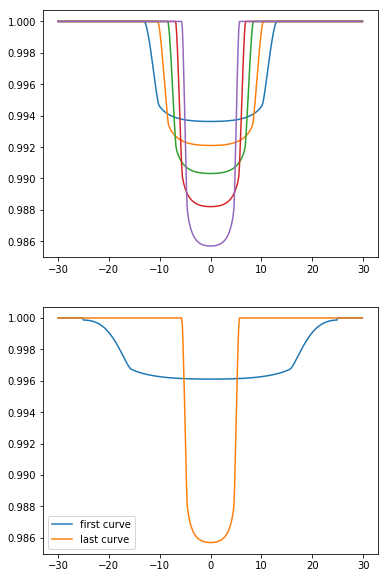

In [4]:
# A bunch of curves
f, axs = plt.subplots(2, figsize=(6,10))
for curveID in bcurves.colnames[10::5]:
    axs[0].plot(bcurves['times'], bcurves[curveID], label=curveID)
axs[1].plot(bcurves['times'], bcurves[bcurves.colnames[1]], label='first curve')
axs[1].plot(bcurves['times'], bcurves[bcurves.colnames[-1]], label='last curve')
plt.legend()

Reading TESS from /common/contrib/classroom/ast520/tess_batman/sampleData/sample_Sector0, s:2, e:3...
Reading batmanCurves from /common/contrib/classroom/ast520/tess_batman/sampleData/batmanCurves_test.csv...
Starting convolutions...
Convolved 300 curves in 0.716 s
===START TCONVOLVE===
Reading TESS from sample_Sector0, s:2, e:3...
Found 1 TESS files to process
Reading batmanCurves from /common/contrib/classroom/ast520/tess_batman/data/batman/batmanCurves_test.csv...
Found 30 Batman curves
Starting TESS file: HD_202772_A_b.fits
Starting convolutions...
Convolved 30 curves in 0.0735 s


/scratch/classroom/ast520/tess_batman/code/tessbatman.py:448: RuntimeWarning: divide by zero encountered in true_divide
  chi_squared.append(np.nansum(((normalized_fluxes - make_lightcurve(T0, RP, INC, PER, width, u_type, u_param, t)) ** 2 / normalized_sigma ** 2) / 8))


30 30
Convolved 1/1 tess files with 30 curves in 0.38 s
===END TCONVOLVE===
===START TCONVOLVE===
Reading TESS from sample_Sector0, s:0, e:9...
Found 9 TESS files to process
Reading batmanCurves from /common/contrib/classroom/ast520/tess_batman/data/batman/batmanCurves_test.csv...
Found 30 Batman curves
Starting TESS file: HD_219666_b.fits
Starting convolutions...
Convolved 30 curves in 0.0736 s
30 30
Starting TESS file: LHS_3844_b.fits
Starting convolutions...
Convolved 30 curves in 0.0734 s
60 60
Starting TESS file: HD_202772_A_b.fits
Starting convolutions...
Convolved 30 curves in 0.0734 s
90 90
Starting TESS file: pi_Men_c.fits
Starting convolutions...
Convolved 30 curves in 0.0734 s
120 120
Starting TESS file: tess2018263035959-s0003-0000000003957254-0123-s_lc.fits
Starting convolutions...
Convolved 30 curves in 0.107 s
150 150
Starting TESS file: tess2018263035959-s0003-0000000003836541-0123-s_lc.fits
Starting convolutions...
Convolved 30 curves in 0.107 s
180 180
Starting TESS f

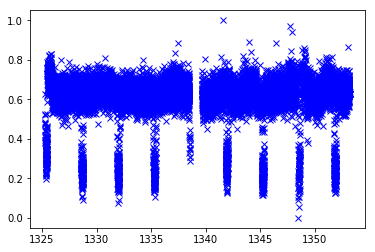

In [5]:
# pt = "/home/ctaiudovicic/projects/tess_batman/data/TESS/"
pt = "/common/contrib/classroom/ast520/tess_batman/sampleData/"
tstart = 2
tend = tstart+1
tess_names = tb.read_tess(pt, pt+"sample_Sector0", tstart, tend)
times, curve_names, batmanCurves = tb.read_batman(pt+"batmanCurves_test.csv")
tess_time, tess_flux = tb.open_tess_fits(tess_names[0], norm=True)
curves, times, convs = tb.convolve(tess_time, tess_flux, batmanCurves, curve_names, num_keep=len(curve_names))

# candidates for tstart to tend
candidates = tb.tbconvolve(pt, path, suffix, 0, tstart, tend, path, num_keep = -1, norm_tess=True, write=False)
# do all candidates and write to file
_ = tb.tbconvolve(pt, path, suffix, 0, 0, 9, path, num_keep = -1, norm_tess=True, write=True)

plt.plot(tess_time, tess_flux, 'bx')

63 81


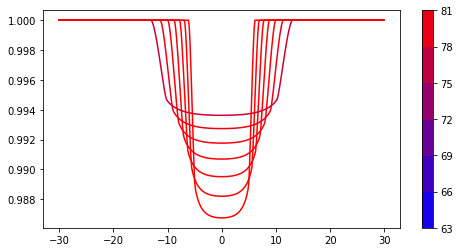

In [6]:
import matplotlib.colors as c
start = 10
step = 71

fig = plt.figure(figsize=(8, 4))
cm = c.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
# make colorbar
cmin = int(100*np.nanmin(candidates['correlation']))
cmax = int(100*np.nanmax(candidates['correlation']))
print(cmin, cmax)
if (cmax-cmin > 5):
    step = (cmax-cmin)//5
    if step < 1:
        step = 1
    Z = [[0,0],[0,0]]
    levels = range(cmin,cmax+step,step)
    CS3 = plt.contourf(Z, levels, cmap=cm)
    plt.clf()

    for i, curve in enumerate(bcurves.colnames[start::step]):#, len(candidates)):
        row = candidates[candidates['curveID'] == curve]
        r = (100*float(row['correlation'])-cmin)/(cmax-cmin)
        if r > 1:
            r = 1
        plt.plot(bcurves['times'], bcurves[curve], color=(r, 0, 1-r))
    plt.colorbar(CS3)

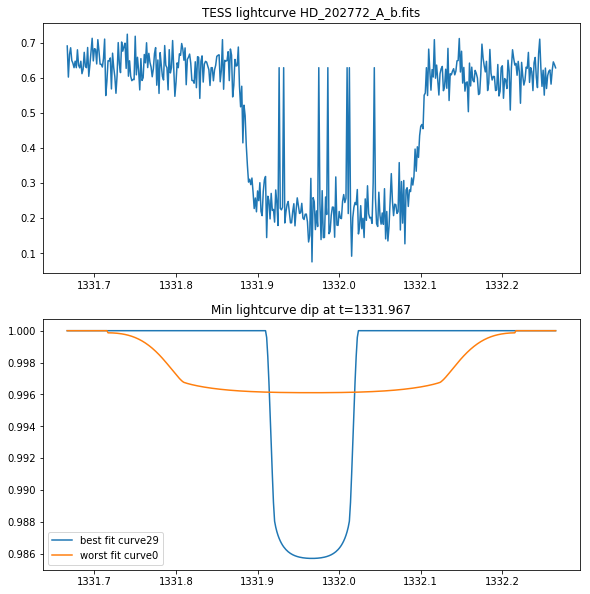

In [7]:
best = candidates[np.argmax(candidates['correlation'])]
worst = candidates[np.argmin(candidates['correlation'])]
tess_curve = tess_names[0].split("/")[-1]

# Search for dip
ind = np.argmin(tess_flux[:15700])
# ind=6311
size = len(bcurves['times'])//2
s = ind-size
e = ind+size
mid = (e+s)//2

# Plot lightcurve, best and worst fits
f, axs = plt.subplots(2, figsize=(8,8))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)

# testcurve = 'curve59'
# axs[0].plot(tess_time[s:e], bcurves[testcurve], label=testcurve)

axs[0].plot(tess_time[s:e], tess_flux[s:e])

axs[1].plot(tess_time[s:e], bcurves[best['curveID']], label='best fit '+best['curveID'])
axs[1].plot(tess_time[s:e], bcurves[worst['curveID']], label='worst fit '+worst['curveID'])


axs[0].set_title("TESS lightcurve {}".format(tess_curve))
axs[1].set_title("Min lightcurve dip at t={:.3f}".format(tess_time[ind]))

axs[1].legend()

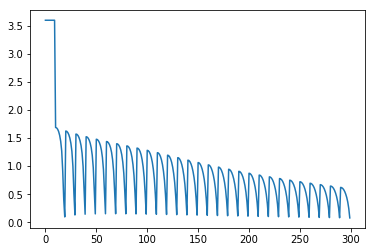

In [8]:
# max convolutions of each curve
plt.plot(convs)

curve0 1345.0458429273376 3.5997885739058475
curve50 1345.2208402412414 1.4796223433230915
curve100 1345.2277845783553 1.2818340849569527
curve150 1345.2236179760864 1.0639466971570841
curve200 1345.2347289154693 0.873283065136318
curve250 1345.2361177828927 0.7218047162490839
curve29 1345.2277845783553 0.12960644526364334


Text(0.5, 33.0, 'time (days)')

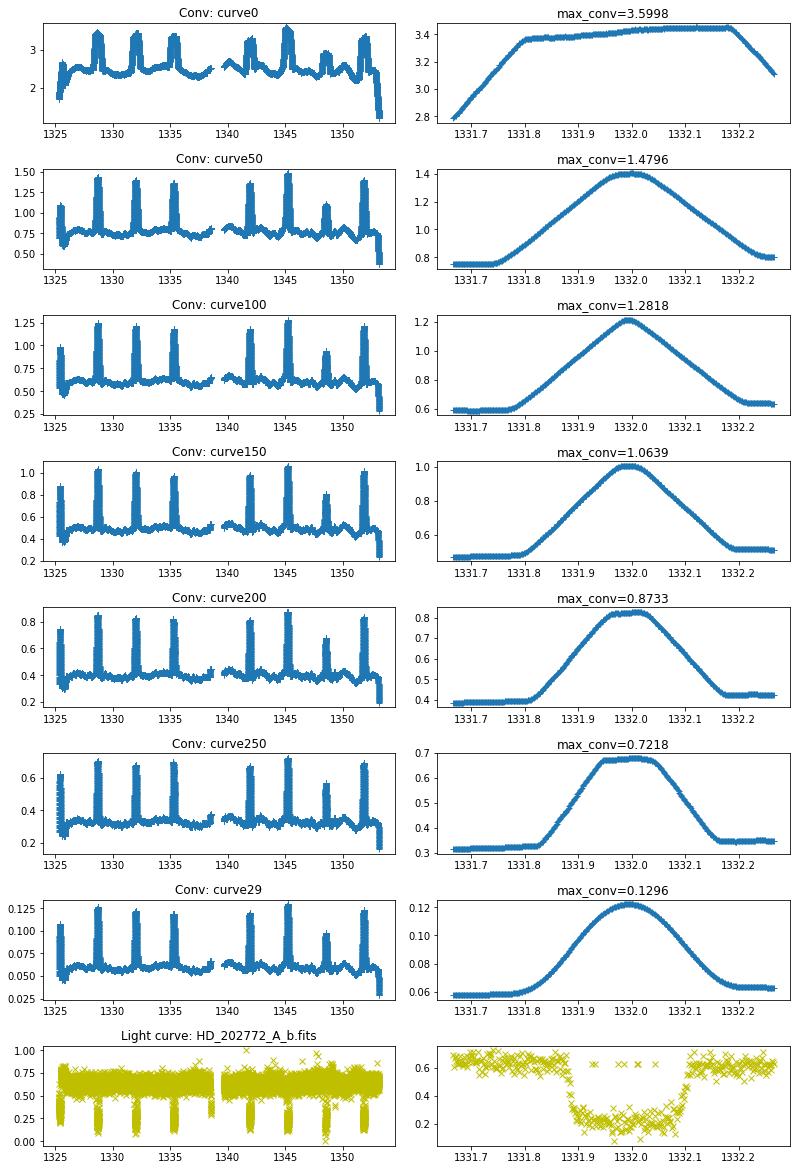

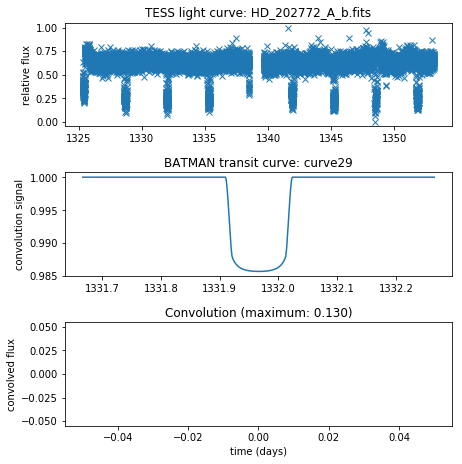

In [9]:
# manual convolve and plots
from scipy.signal import fftconvolve
plot = True


cnames = np.append(curve_names[0::50], best['curveID'])
nplots = len(cnames)+1
fig, axs = plt.subplots(nplots,2, figsize=(11, nplots*2))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)
for i, curvename in enumerate(cnames):
    batman_curve = batmanCurves[curvename]
    conv = np.abs(fftconvolve(1-tess_flux, (1-batman_curve), 'same'))
    ind_max = np.argmax(conv)
    conv_max = conv[ind_max]
    
    print(curvename, tess_time[ind_max], conv_max)
    axs[i,0].plot(tess_time, conv, '+')
    axs[i,1].plot(tess_time[s:e], conv[s:e], '+')
    axs[i,0].set_title("Conv: {}".format(curvename))
    axs[i,1].set_title("max_conv={:.4f}".format(conv_max))

     
axs[-1,0].plot(tess_time, tess_flux, 'yx')
axs[-1,1].plot(tess_time[s:e], tess_flux[s:e], 'yx')
axs[-1,0].set_title("Light curve: {}".format(tess_names[0].split("/")[-1]))


fig2,axs2 = plt.subplots(3, figsize=(6,6))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.5)

axs2[0].set_title("TESS light curve: {}".format(tess_names[0].split("/")[-1]))
axs2[0].set_ylabel("relative flux")
axs2[0].plot(tess_time, tess_flux, 'x')
axs2[1].set_title("BATMAN transit curve: {}".format(best['curveID']))
axs2[1].set_ylabel("convolution signal")
axs2[1].plot(tess_time[s:e], bcurves[best['curveID']], label=best['curveID'])
axs2[2].set_title("Convolution (maximum: {:.3f})".format(conv_max))
axs2[2].set_ylabel("convolved flux")
axs2[2].plot(tess_time[conv>0.45], conv[conv>0.45], '+')
axs2[2].set_xlabel("time (days)")

In [12]:
import pandas as pd
chisq_file = path+"chisq_test.csv"
chisq = pd.read_csv(chisq_file)

In [14]:
chisq.sort_values('chisq').head(20)

,Unnamed: 0,sector,tessFile,curveID,tcorr,correlation,chisq,rp,i,width,per,u,ld,t0,e,w
0,0,sample_Sector0,HD_219666_b.fits,curve0,1347.353894,0.605856,inf,0.1,90.0,0.000126,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
171,171,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve21,1390.334715,0.623584,inf,0.1,90.0,0.001300,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
172,172,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve22,1390.336104,0.624963,inf,0.1,90.0,0.001452,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
173,173,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve23,1390.338882,0.625632,inf,0.1,90.0,0.001623,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
174,174,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve24,1390.340271,0.626117,inf,0.1,90.0,0.001814,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
175,175,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve25,1390.341660,0.626099,inf,0.1,90.0,0.002027,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
176,176,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve26,1397.541622,0.626434,inf,0.1,90.0,0.002266,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
177,177,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve27,1390.348604,0.627184,inf,0.1,90.0,0.002532,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
178,178,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve28,1390.349993,0.628785,inf,0.1,90.0,0.002830,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
179,179,sample_Sector0,tess2018263035959-s0003-0000000003836541-0123-...,curve29,1390.354160,0.630853,inf,0.1,90.0,0.003162,100.0,0.1 0.3,quadratic,0.0,0.0,0.0
